Files already downloaded and verified
Files already downloaded and verified


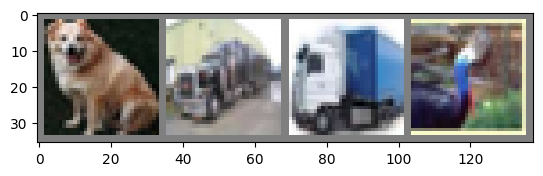

dog   truck truck bird 


In [1]:
from model import *
from utils import imshow

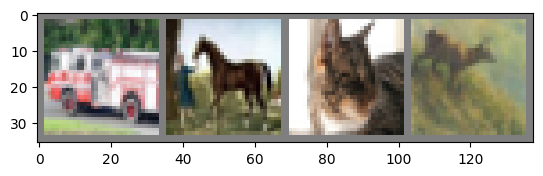

truck horse cat   deer 


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # denormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [3]:
train()

[1,  2000] loss: 2.173
[1,  4000] loss: 1.852
[1,  6000] loss: 1.623
[1,  8000] loss: 1.539
[1, 10000] loss: 1.504
[1, 12000] loss: 1.421
[2,  2000] loss: 1.358
[2,  4000] loss: 1.336
[2,  6000] loss: 1.331
[2,  8000] loss: 1.306
[2, 10000] loss: 1.274
[2, 12000] loss: 1.257
Finished Training


In [4]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

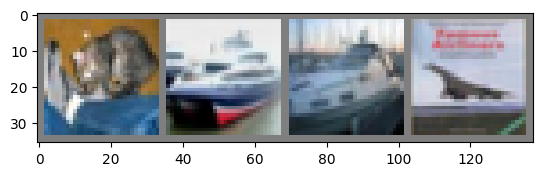

GroundTruth:  cat   ship  ship  plane


In [5]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [6]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [7]:
outputs = net(images)

In [8]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted:  cat   ship  truck ship 


In [9]:
test()

Accuracy of the network on the 10000 test images: 54 %
Accuracy for class: plane is 45.1 %
Accuracy for class: car   is 46.0 %
Accuracy for class: bird  is 56.9 %
Accuracy for class: cat   is 43.4 %
Accuracy for class: deer  is 49.3 %
Accuracy for class: dog   is 25.6 %
Accuracy for class: frog  is 71.4 %
Accuracy for class: horse is 62.8 %
Accuracy for class: ship  is 67.5 %
Accuracy for class: truck is 76.8 %
